# Decision Tree

## Overview

- **Approach**: Machine Learning
- **Types**: Covers both Regression and Classification
- **Description**: A decision tree represents possible outcomes of a series of decisions
  - Allows comparing or evaluating possible actions based on:
    - Costs
    - Probabilities
    - Benefits

## Structure

- A decision tree starts with a single node
  - This node branches out to possible cases (outcomes)
  - These can lead to additional nodes
  - This operation repeats, resulting in a tree structure
- **Test Condition**: Condition at a node. We check the test condition and assign control to an outgoing edge.
- **Class Variable**: Each leaf node is assigned to a class
- The tree is considered complete when all test conditions end in leaf nodes.
- A decision tree includes:
  - Root Node: The topmost node
  - Internal Nodes: A node with one incoming edge and two or more outgoing edges
  - Leaf Nodes: Terminal nodes giving the class. There are no outgoing edges.

## Creation

### Phases

1. **Tree Construction**:
  - The tree can grow large
2. **Tree Pruning**:
  - Identify and remove branches representing "noise" to reduce the error rate.

### Algorithm

- At each step, select the best variable (node) as the test condition
- Split the node based on possible cases, resulting in internal nodes
- Repeat this step until the test conditions lead to leaf nodes.
- Remove subtrees that do not improve classification accuracy (pruning).

## Attribute Selection

- **Question**: What is the best attribute to start with?
- Starting with different attributes can lead to different learning outcomes.
- For N variables, there are N possible starting nodes.
- The number of possible node choices decreases as we go down the tree.

### Measures for Node Selection

1. **Gini Index**
2. **Entropy**
  - Information Gain

### Entropy

- **Definition**: Measures the degree of variability or homogeneity in the tree
  - If the data is completely homogeneous, entropy is 0
  - If the data is split 50% / 50%, entropy is 1

$$H(X) = - \sum_{x \in X} p(x) \log_2 p(x)$$

### Gini Index

- **Definition**: Measures the quality of a split based on the heterogeneity of the classes of the two groups created by the split
  - Measures the degree of variability or homogeneity in the tree
  - A perfect split gives a score of 0

#### Formula

- Binary Case: 

$$\text{Gini} = 1 - \sum_{t=0}^{t=1} P_t^2$$

- Multiple Classes:

$$\text{Gini} = 1 - \sum_{t=0}^{t=k} P_t^2$$

### Information Gain

- **Definition**: The reduction/increase in entropy when a node is split
  - **Rule**: An attribute/node should have the highest gain to be selected

## Tree Construction

- Use Information Gain to automate the process
  - At each level, choose:
    - Which variable to use for splitting
    - At what level to split
  - **Rule**: Choose based on the information gain
    - The attribute or variable that gives the highest gain is selected.


Classification Accuracy: 0.9
Confusion Matrix:
[[12  3]
 [ 0 15]]
Classification Report:
              precision    recall  f1-score   support

      Effect       1.00      0.80      0.89        15
   No effect       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



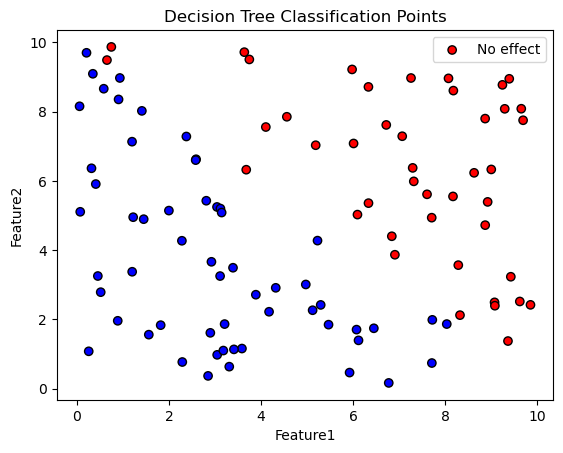

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

# Generate fictitious data for classification
np.random.seed(42)
X_class = np.random.rand(100, 2) * 10
y_class = np.where(X_class[:, 0] + X_class[:, 1] > 10, 'Effect', 'No effect')

# Create DataFrame
df_class = pd.DataFrame(X_class, columns=['Feature1', 'Feature2'])
df_class['Class'] = y_class

# Split the data into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Create and train the Decision Tree model for classification
clf = DecisionTreeClassifier()
clf.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = clf.predict(X_test_class)

# Evaluate the model
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Plot the points with legend
colors = np.where(y_class == 'Effect', 'red', 'blue')
plt.scatter(X_class[:, 0], X_class[:, 1], c=colors, edgecolor='k', label='Data points')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Tree Classification Points')
plt.legend(['No effect', 'Effect'])
plt.show()


Regression Mean Squared Error: 3.742500536088995


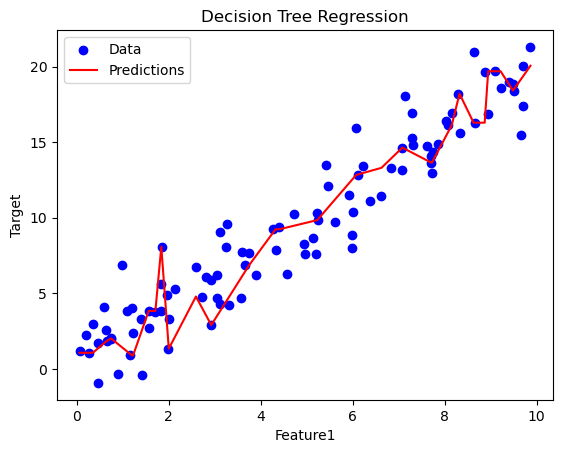

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate fictitious data for regression
np.random.seed(42)
X_reg = np.random.rand(100, 1) * 10
y_reg = X_reg[:, 0] * 2 + np.random.randn(100) * 2  # y = 2x + noise

# Create DataFrame
df_reg = pd.DataFrame(X_reg, columns=['Feature1'])
df_reg['Target'] = y_reg

# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Create and train the Decision Tree model for regression
reg = DecisionTreeRegressor()
reg.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_reg = reg.predict(X_test_reg)

# Evaluate the model
print("Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

# Sort the test data and predictions for better plotting
sorted_indices = np.argsort(X_test_reg[:, 0])
X_test_reg_sorted = X_test_reg[sorted_indices]
y_pred_reg_sorted = y_pred_reg[sorted_indices]

# Plot the results
plt.scatter(X_reg, y_reg, color='blue', label='Data')
plt.plot(X_test_reg_sorted, y_pred_reg_sorted, color='red', label='Predictions')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


## Example: Decision Tree for Classification

In this example, we generate fictitious data for a classification problem with two classes: "Effect" and "No effect". We then create, train, and evaluate a decision tree classifier, and visualize the decision boundary.

## Example: Decision Tree for Regression

In this example, we generate fictitious data for a regression problem where the target variable is a linear function of the feature with added noise. We then create, train, and evaluate a decision tree regressor, and plot the results.
